# Introduction

## Diabetes Prediction

Le but de ce projet est de **prédire la présence de diabète chez une personne** (variable `Outcome`) en fonction de divers paramètres tels que la pression sanguine, le body-mass index (BMI), etc.

Pour plus de précision sur les data, voir le lien suivant:<br>
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Exercice


### Load Data
1. Loadez et examinez les data.<br>
   ```
   df = pd.read_csv('./data/diabetes.csv')
   ```


### Data Analysis
2. Vérifiez s'il existe des data dupliquées ou manquantes:<br>
   ```
   train_df.duplicated().sum()
   train_df.isna().values.sum()
   ```

3. Vérifiez s'il existe des data qui valent 0:<br>
   ```
   (df == 0).sum()
   ```


4. Dans les colonnes où cela est pertinent, remplacez les 0 par la moyennes des valeurs non nulle:<br>
   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html<br>
   **Remarque:** cette pratique, appelée **imputing** s'effectue normalement après le train-test split...


5. Visualisez la répartition des valeurs de la variable `Outcome`:<br> 
   ```
   ...
   sns.countplot(y_train, order=y_train.value_counts().index)
   plt.xticks(rotation = 15)
   ...
   ```
   
6. Visualisez la répartition des valeurs de la variable `Glucose`:<br> 
   ```
   ...
   plt.scatter(df.index, df.Glucose, c=df.Outcome)
   ...
   ```


### > Problème de classification
### Train-Test Split
7. Spittez les data en un **train set** et un **test set** selon les proportions 80% / 20%.<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
   ```
   X_train, X_test, y_train, y_test = train_test_split(...)
   ```
   Comprenez ce que vous êtes en train de faire.


### Model and Results
8. Instanciez et entraînez une **régression logistique** `LogisticRegression` sur vos data (nous verrons ce modèle plus en détails par la suite):<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
    Le processus s'effectue en 3 étapes:
    1. Instanciation du modèle
    2. Entraînement du modèle sur le train set (méthode `fit(...)`)
    3. Prédictions et évaluation sur le test set


9. Calculez ensuite le **rapport de classification** de votre modèle sur le test set:<br>
    Que représentent la **precision**, le **recall**, l'**accuracy** et le **F1-score**?<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html<br>    
    

### > Problème de régression
### Train-Test Split
10. Spittez les data en un **train set** et un **test set** selon les proportions 80% / 20%.<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
   ```
   X_train, X_test, y_train, y_test = train_test_split(...)
   ```
   Comprenez ce que vous êtes en train de faire.


### Model and Results
11. Instanciez et entraînez une **régression linéaire** `LinearRegression` sur vos data (nous verrons ce modèle plus en détails par la suite):<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html<br>
    Le processus s'effectue en 3 étapes:
    1. Instanciation du modèle
    2. Entraînement du modèle sur le train set (méthode `fit(...)`)
    3. Prédictions et évaluation sur le test set


12. Faites le graphique des `y` que vous avez prédits sur le test set en fonction des vraies valeurs `y_test`.<br>
   Ce graphique devrrait avoir une allure diagonale, pourquoi? Est-ce le cas ici?

## Libraries

In [21]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [22]:
df = pd.read_csv('./data/diabetes.csv')

In [23]:
df.shape

(768, 9)

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Analysis

In [25]:
# check duplicates
df.duplicated().sum()

0

In [26]:
# check missing values
df.isna().values.sum()

0

In [27]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [28]:
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:

    mean = df[df[col] != 0][col].mean()
    df[col] = df[col].replace(0, mean)
    print((df[col] == 0).sum())

0
0
0
0
0


/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


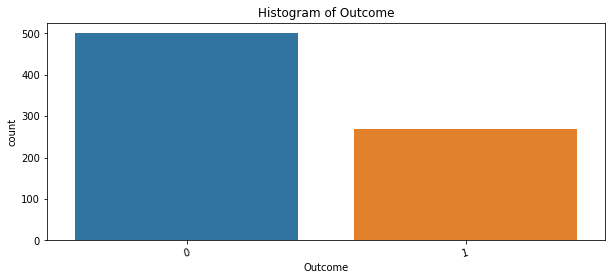

In [29]:
# histogram of Outcome variable
plt.figure(figsize=(10, 4))

plt.title('Histogram of Outcome')
sns.countplot(df.Outcome, order=df.Outcome.value_counts().index)
plt.xticks(rotation = 15)

plt.show()
# the variable Outcome is imbalanced

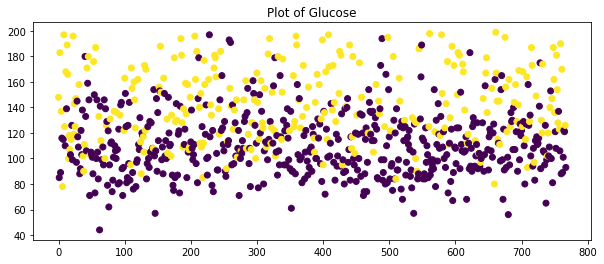

In [30]:
# plot of BMI variable
plt.figure(figsize=(10, 4))

plt.title('Plot of Glucose')
plt.scatter(df.index, df.Glucose, c=df.Outcome)

plt.show()

> ## Problème de classification

## Train-Test Split

In [31]:
# split data
X = df.drop(["Outcome"], axis=1)
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

## Model and Results

In [33]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_test_pred = logreg.predict(X_test)

In [34]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



> ## Problème de régression

## Train-Test Split

In [35]:
df_new = pd.get_dummies(df, columns=["Outcome"])

In [36]:
# split data
X = df_new.drop(["Glucose"], axis=1)
y = df_new.Glucose

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Models and Results

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_preds = lr.predict(X_test)

In [38]:
lr.score(X_test, y_test)

0.3797743274809623

In [39]:
mean_squared_error(y_test, y_test_pred)

15557.603896103896

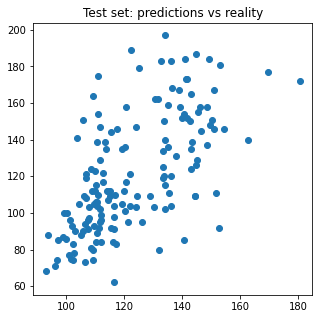

In [40]:
# test predictions vs realits
plt.figure(figsize=(5, 5))

plt.title('Test set: predictions vs reality')
plt.scatter(y_test_preds, y_test)

plt.show()